# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview


In [2]:
# Importing the data
data = pd.read_csv('stock_data.csv')

In [3]:
# Checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") 

There are 340 rows and 15 columns.


In [4]:
# Viewing a sample of 10 rows from the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [5]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Comment**

- Firstly, it is a small dataset as it has only 340 rows and 15 columns.
- Memory usage is 40KB and actually there is no need to convert the 4 Object type columns to categories.
- The rest columns are 4 integer and 7 float64.
- We can observe that is needed to edit and rename the column names. 

In [6]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
# Fixing the column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [9]:
# Checking for missing values in the data
df.isna().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

**Comment**

From the above commands:
- We copied the dataset so to avoid losing the prototype.
- We succeded to fix the column names.
- Checked for missing values and duplicated and we didn't find any in the dataset.


In [10]:
# Droping the column 'Ticket_Symbol' as it has no importance
df.drop("Ticker_Symbol", axis=1, inplace=True)

In [11]:
# Checking the statistical summary of the data for the numerical values
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Current_Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price_Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash_Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net_Cash_Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net_Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings_Per_Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated_Shares_Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E_Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [12]:
# Filtering object type columns
cat_columns = df.describe(include=["object"]).columns
cat_columns

Index(['Security', 'GICS_Sector', 'GICS_Sub_Industry'], dtype='object')

In [13]:
# Checking for unique values at the categorical columns
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Security are :
American Airlines Group    1
NextEra Energy             1
Nucor Corp.                1
Northern Trust Corp.       1
Norfolk Southern Corp.     1
                          ..
Equity Residential         1
Equinix                    1
EOG Resources              1
Eastman Chemical           1
Zoetis                     1
Name: Security, Length: 340, dtype: int64
**************************************************
Unique values in GICS_Sector are :
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS_Sector, dtype: int64
**************************************************
Unique values in GICS_Sub_Industry are :
Oil & Gas Exploration &

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**<a name='questions'>Questions<a>**:
    
    click the link to go directly to the following solution.


- <a href = #link1>1. What does the distribution of stock prices look like?</a>
- <a href = #link2>2. The stocks of which economic sector have seen the maximum price increase on average?</a>
- <a href = #link3>3. How are the different variables correlated with each other?</a>
- <a href = #link4>4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?</a>
- <a href = #link5>5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?</a>

### Univariate analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# Filtering numeric type columns
num_columns = df.describe(exclude=["object"]).columns
num_columns

Index(['Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio',
       'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share',
       'Estimated_Shares_Outstanding', 'P/E_Ratio', 'P/B_Ratio'],
      dtype='object')

<a name='link1'>**Distribution of the Stock Prices.**</a>

or return to <a href = #questions>Questions</a>

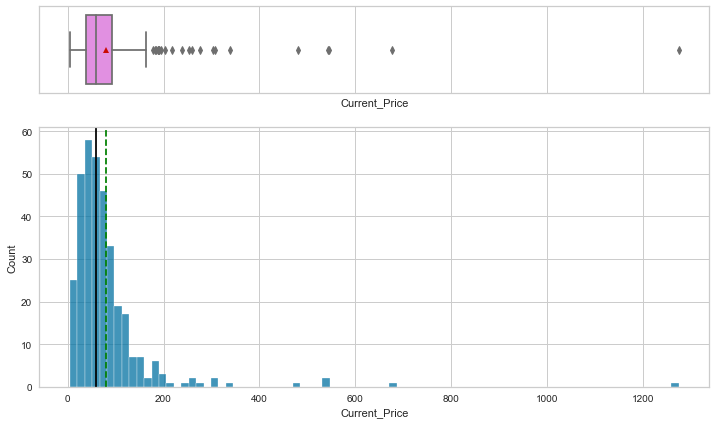

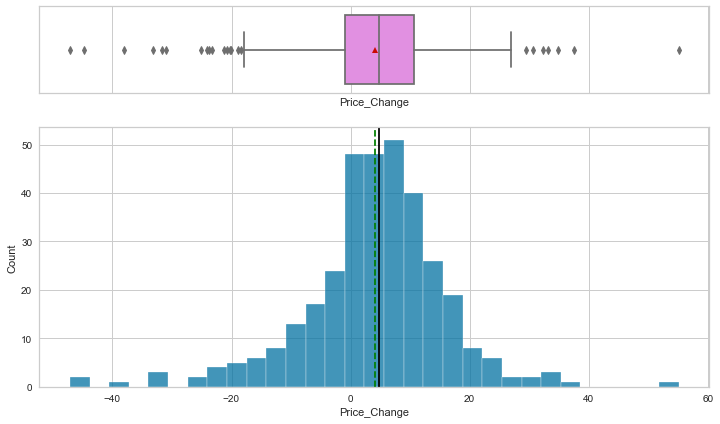

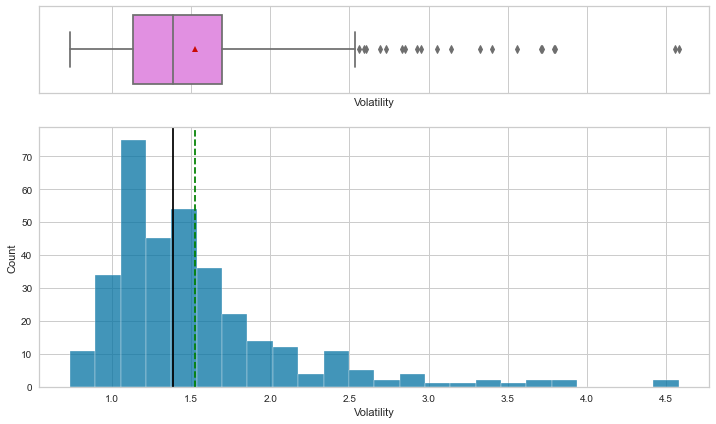

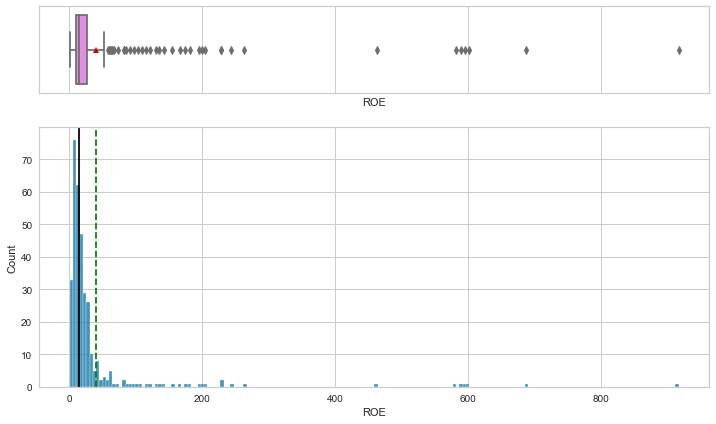

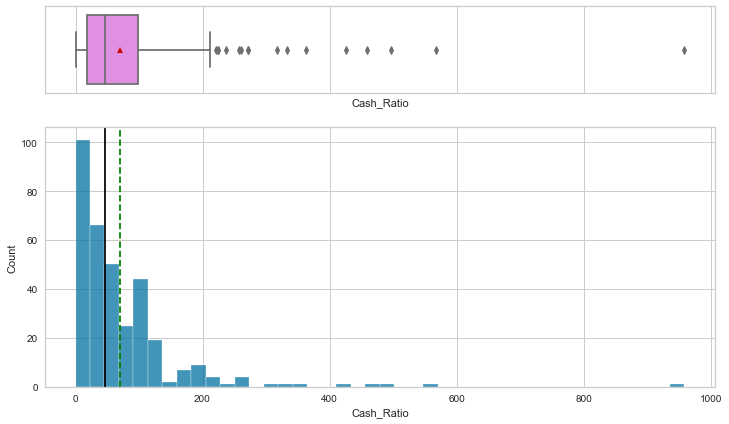

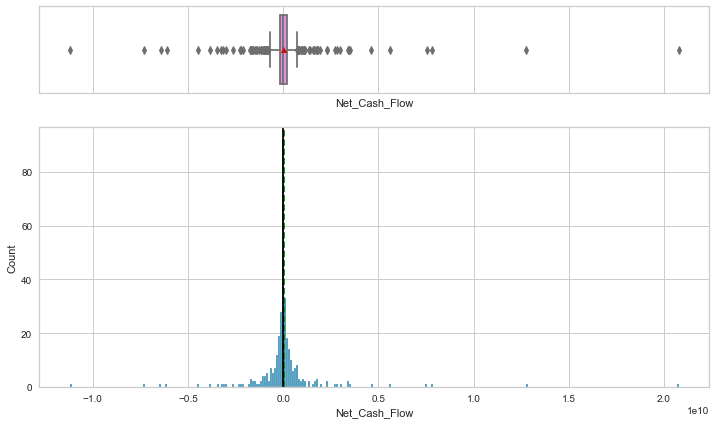

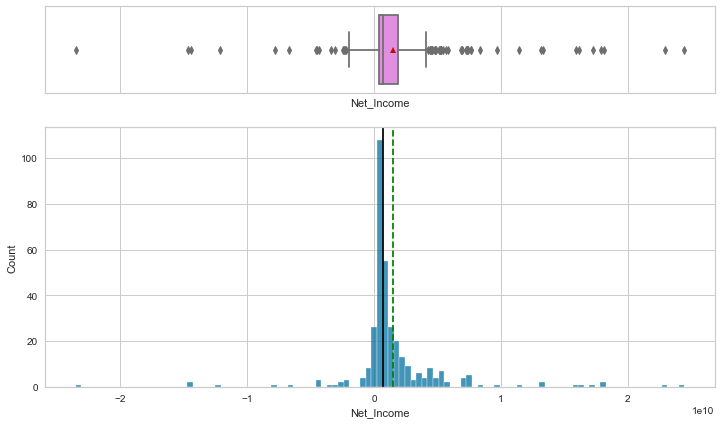

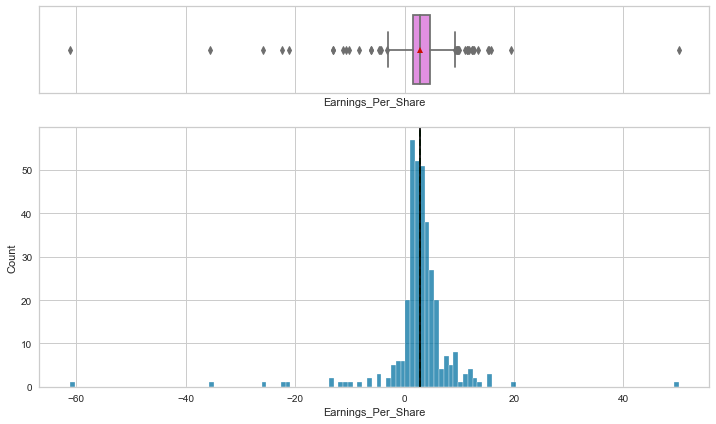

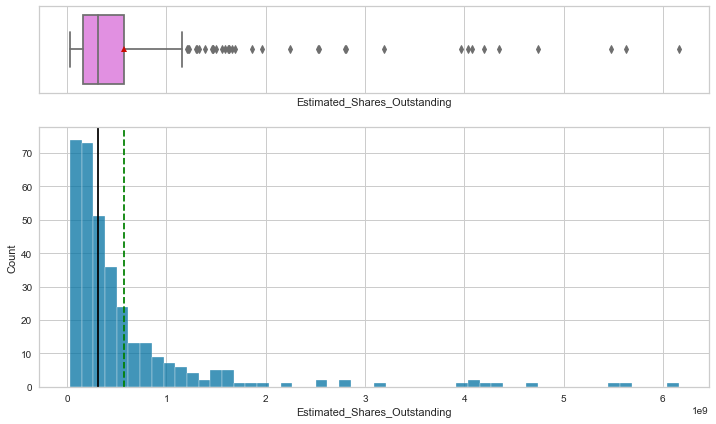

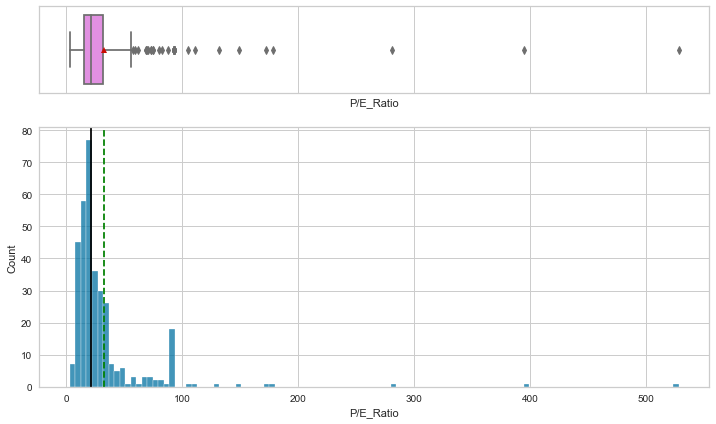

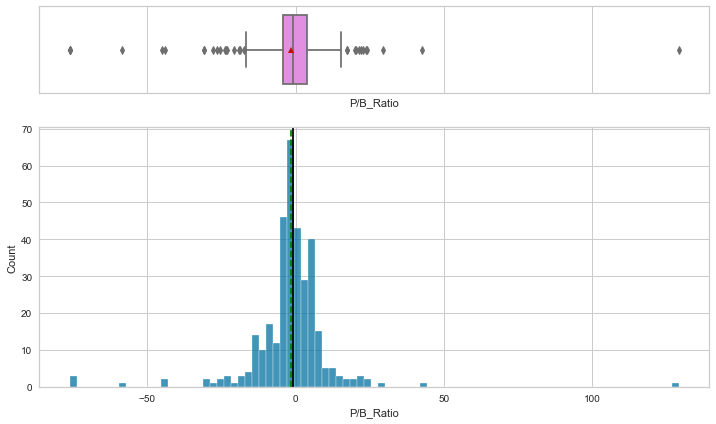

In [16]:
# Presenting histograms_boxplots for all the numerical columns
for feature in num_columns:
    histogram_boxplot(
        df, feature, figsize=(12, 7), kde=False, bins=None
    )  

## Observations


**<u>Current price</u>**
- Current Price distribution is  very skewed to the right.
- We observe outliers only at the right side as expected.

**<u>Price change</u>**
- The distribution looks normal with long tails on bothsides.
- Outliers on both sides.

**<u>Volatility</u>**
- The distribution is heavily skewed to the right.
- Outliers only to the right side.

**<u>ROE</u>**
- The distribution is heavily skewed to the right.
- Outliers only to the right side.

**<u>Cash Ratio</u>**
- One more heavily right skewed distribution.
- Outliers only on the right side.

**<u>Net Cash Flow</u>**
- Right skewed distribution with long tails on both sides.
- Outliers also on both sides.

**<u>Earning per Share</u>**
- The distribution is slightly left skewed with long tails.
- As expected outliers on both sides.

**<u>Net Income</u>**
- The distribution is normal skewed.
- As expected outliers on both sides.

**<u>Earning per Share</u>**
- The distribution is very skewed to the right.
- Outliers only on left side.

**<u>Estimated Shares Outstanding</u>**
- The distribution is very heavily skewed to the right.
- Outliers only on left side.

**<u>P/E Ratio</u>**
- Heavily right skewed distribution.
- Outliers on the right side.

**<u>P/E Ratio</u>**
- Normal skewed distribution.
- Outliers on the both side.
    
## Conclusions

- From our point of view everything seem to be realistic and normal as also the outliers at every attribute.

**A CDF Plot for only the numerical Variables**

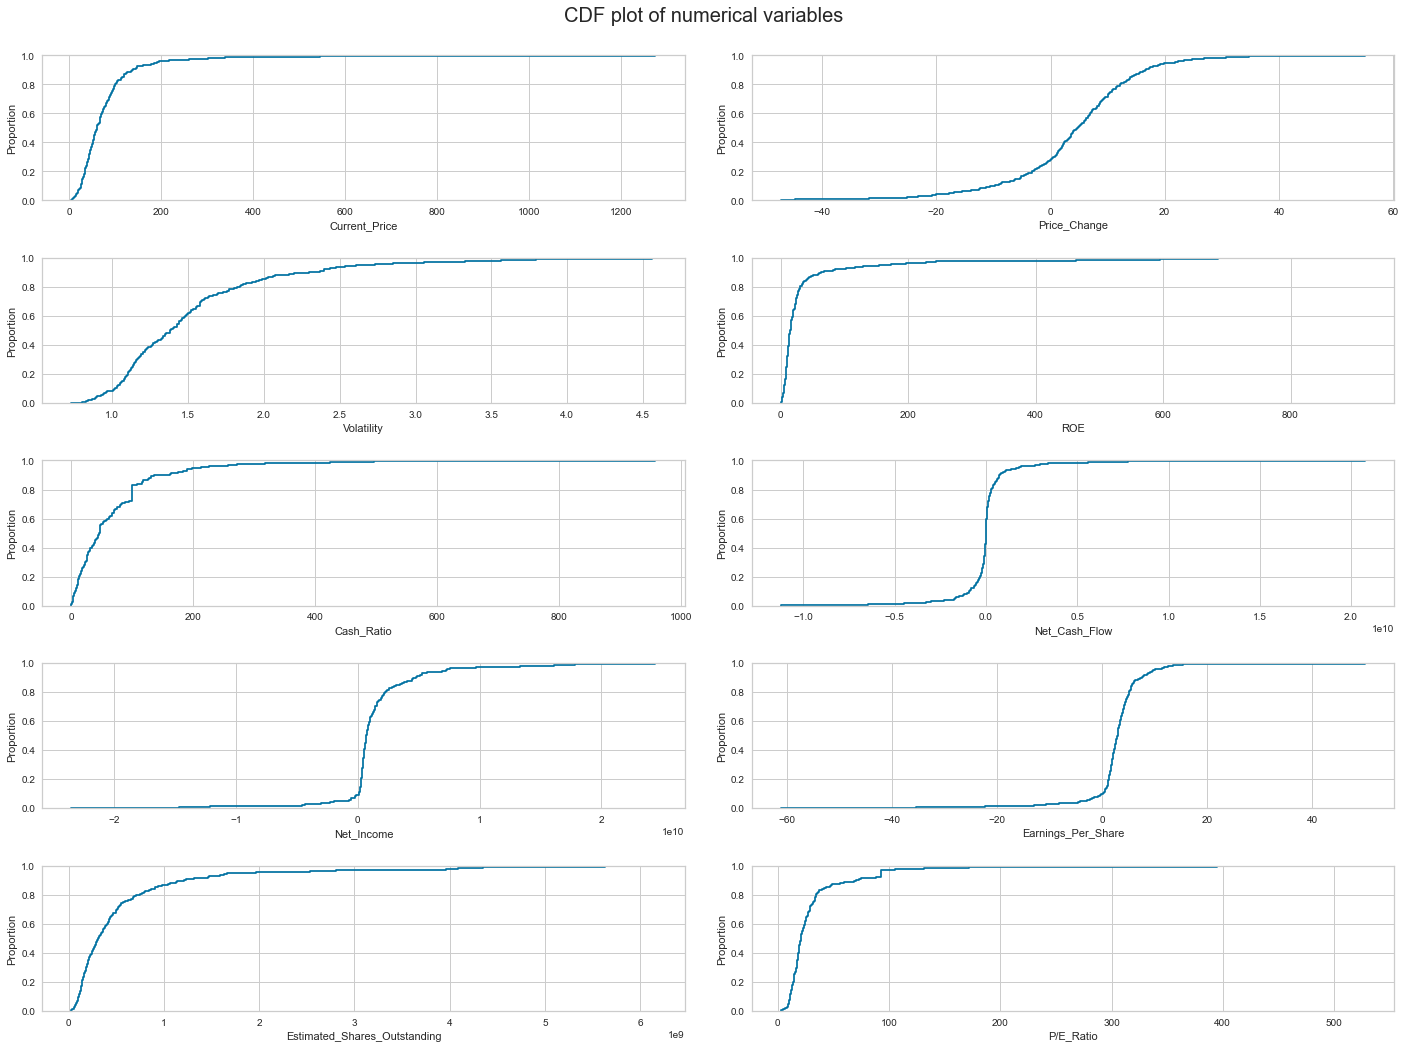

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(5):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_columns[counter]])
    counter = counter + 1
    if counter != 12:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_columns[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**GICS_Sector**

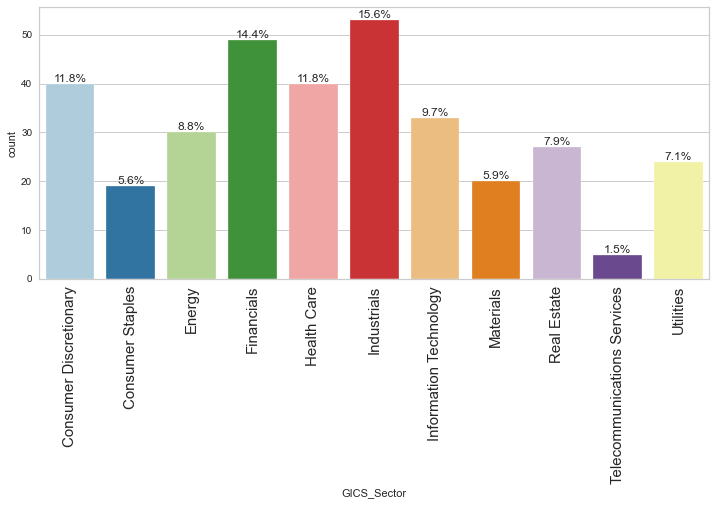

In [19]:
labeled_barplot(
    df, "GICS_Sector", perc=True
)


**Comments**

- More than 50% of the whole entries belong to sectors as:
    - Industrial 15.6%
    - Financials 14.4%
    - Helath Care and Consumer Discretionary (11.8% each)

**GICS_Sub_Industry**

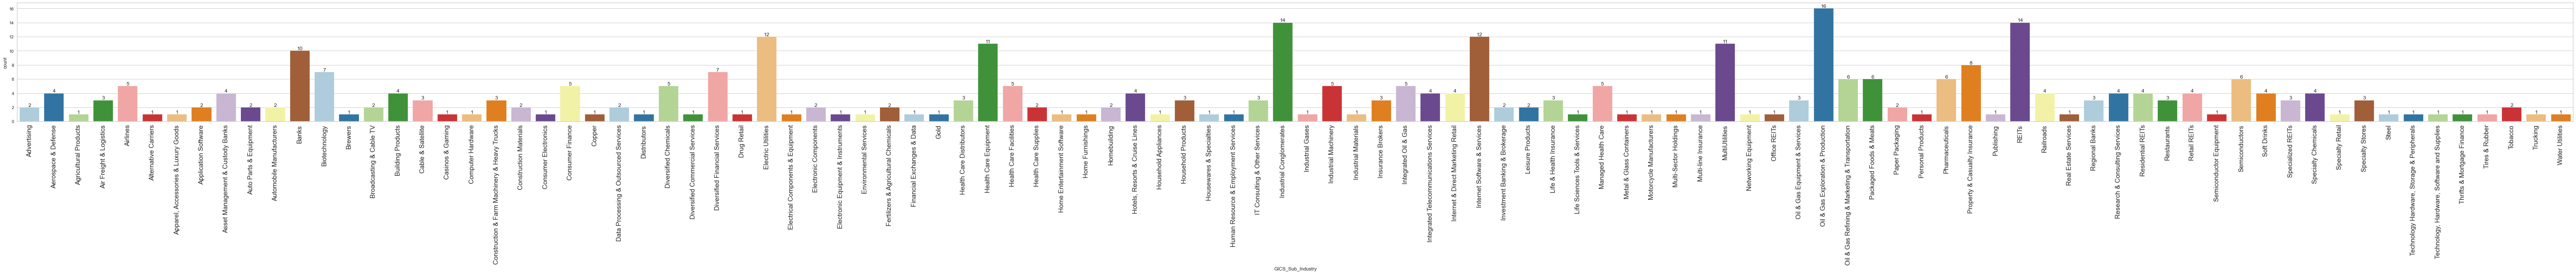

In [20]:
#create labeled barplot of stocks by sub industry
labeled_barplot(df, 'GICS_Sub_Industry')

**The top 10 categories are:**

In [21]:
df['GICS_Sub_Industry'].value_counts().head(10)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Health Care Equipment                 11
MultiUtilities                        11
Banks                                 10
Property & Casualty Insurance          8
Diversified Financial Services         7
Name: GICS_Sub_Industry, dtype: int64

**Finding also usefull information from this pairplot** 

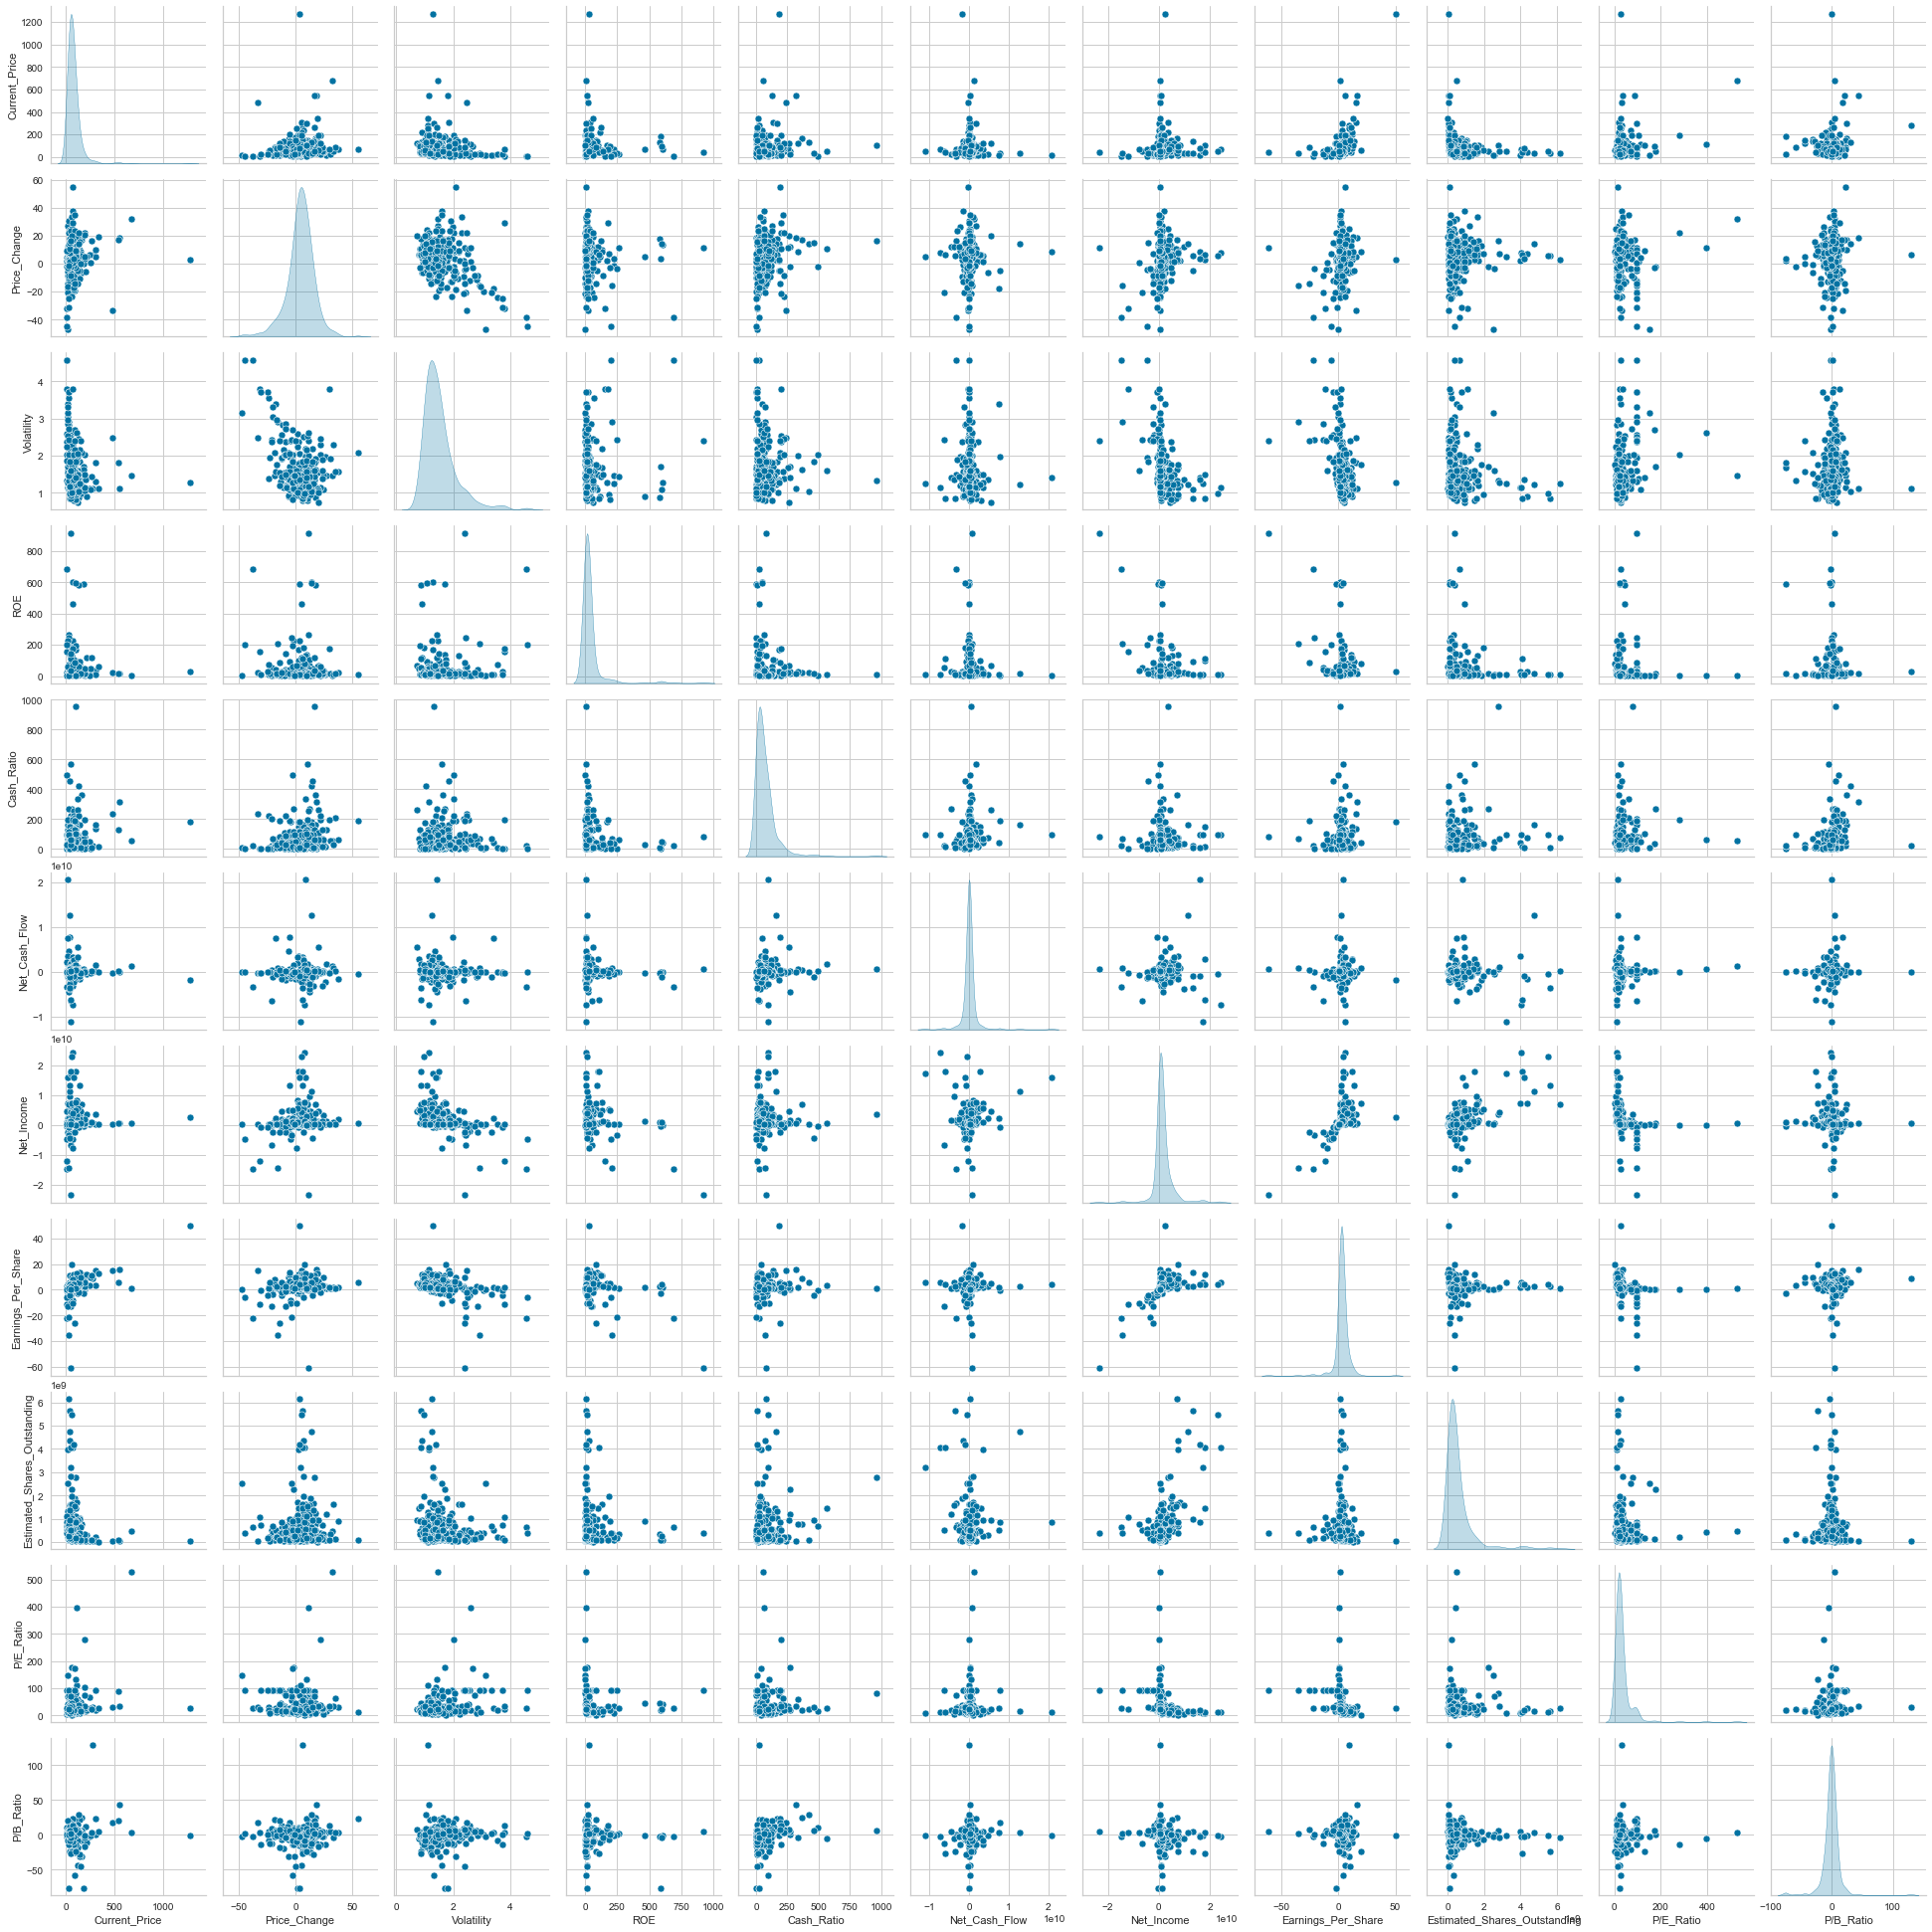

In [22]:
sns.pairplot(data=df[num_columns], diag_kind="kde")
plt.show()

### Bivariate Analysis

<a name='link2'>**Checking the stocks of which economic sector have seen the maximum price increase on average.**</a>

or return to <a href = #questions>Questions</a>

In [23]:
df.groupby('GICS_Sector')['Price_Change'].mean().sort_values()

GICS_Sector
Energy                        -10.228289
Utilities                       0.803657
Industrials                     2.833127
Financials                      3.865406
Materials                       5.589738
Consumer Discretionary          5.846093
Real Estate                     6.205548
Telecommunications Services     6.956980
Information Technology          7.217476
Consumer Staples                8.684750
Health Care                     9.585652
Name: Price_Change, dtype: float64

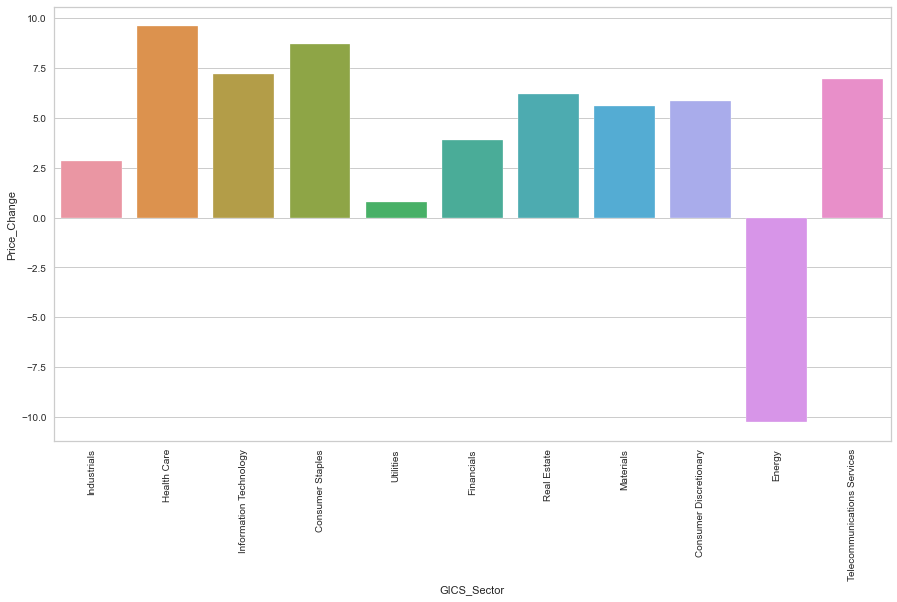

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Price_Change', ci=False)  
plt.xticks(rotation=90)
plt.show()

**Comments**

- Stocks in Health Care and Consumer Staples have shown the highest average price increase.
- From the other hand, negatively the Energy sector has shown a significant dicrease.
- Stocks like Utilities has shown not to change dramaticaly as it has increased a little bit.

<a name='link3'>**How are the different variables correlated with each other?**</a>

or return to <a href = #questions>Questions</a>

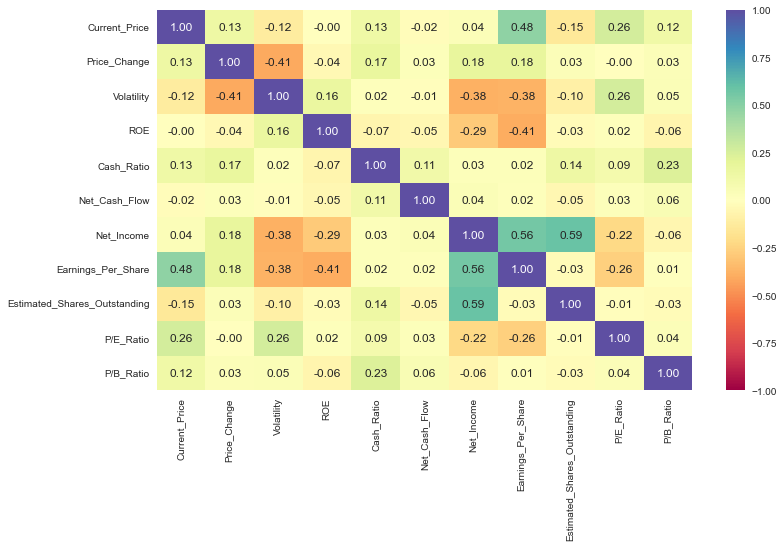

In [25]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Comments**

- Several variables are moderately correlated (+/- .40) with one another
    - Current_Price is positive correlated with Earning_per_Share.
    - Price_Change is negative correlated with Volatility as expected.
    - Volatility is negatively correlated with Net_Income and Earning_per_Share.
    - ROE is negative correlated with Earnings_per_Share and slightly with Net_Income.
    - Net income is negatively correlayed with Volatility and ROE, and also positively correlated with Earning_per_Share  and Estimated_Shares_Outstanding.

<a name='link4'>**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**</a>

or return to <a href = #questions>Questions</a>

In [26]:
df.groupby('GICS_Sector')['Cash_Ratio'].mean().sort_values(ascending=False)

GICS_Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash_Ratio, dtype: float64

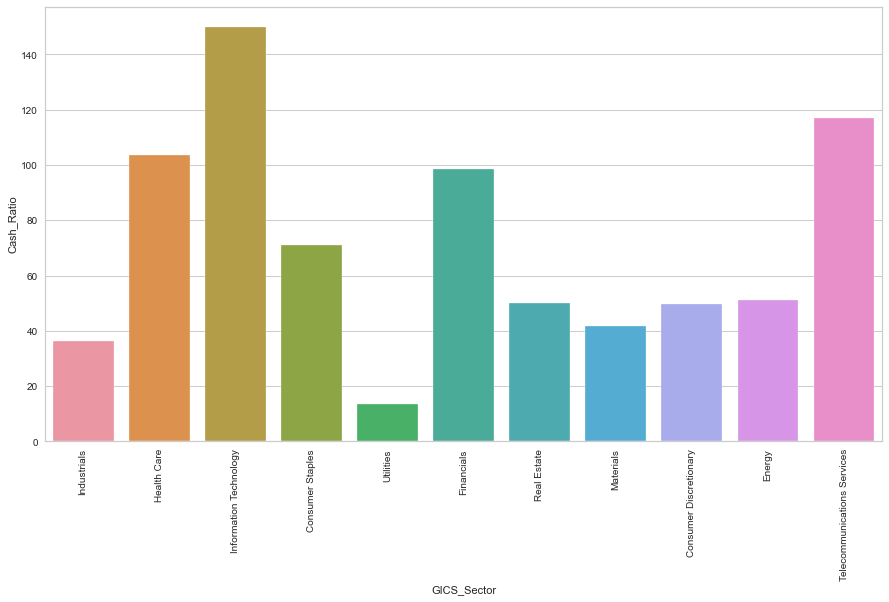

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Cash_Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Comments**

- Both IT and Telecommunications sectors are having the higher average cash ratios.
- As expected follow Helath Care and Financials.
- Utilities has the lowest average cash ratios of all sectors

<a name='link5'>**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**</a>

or return to <a href = #questions>Questions</a>

In [28]:
df.groupby('GICS_Sector')['P/E_Ratio'].mean().sort_values(ascending=False)

GICS_Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E_Ratio, dtype: float64

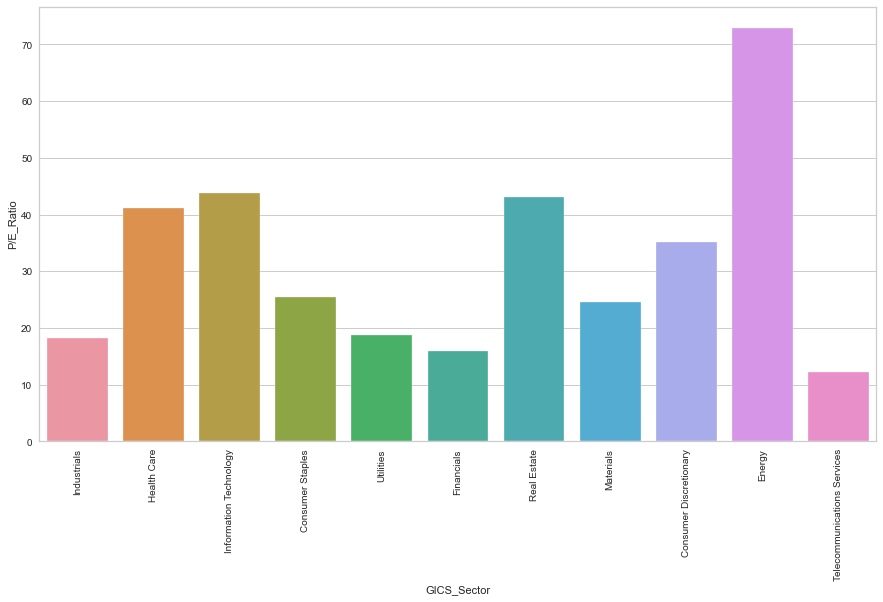

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='P/E_Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Comments**

- Energy companies have the highest average P/E ratios.
- Follow the IT, Real Estate and Helath Care.
- Telecommunication Services having the lowest average.

## Data Preprocessing

In [30]:
# Variables used for clustering
num_columns

Index(['Current_Price', 'Price_Change', 'Volatility', 'ROE', 'Cash_Ratio',
       'Net_Cash_Flow', 'Net_Income', 'Earnings_Per_Share',
       'Estimated_Shares_Outstanding', 'P/E_Ratio', 'P/B_Ratio'],
      dtype='object')

In [31]:
# Scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [32]:
# Creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.178151429073042
Number of Clusters: 5 	Average Distortion: 2.1303826401913164
Number of Clusters: 6 	Average Distortion: 2.0728114444532677
Number of Clusters: 7 	Average Distortion: 2.0049396373681247
Number of Clusters: 8 	Average Distortion: 1.9692925454598702


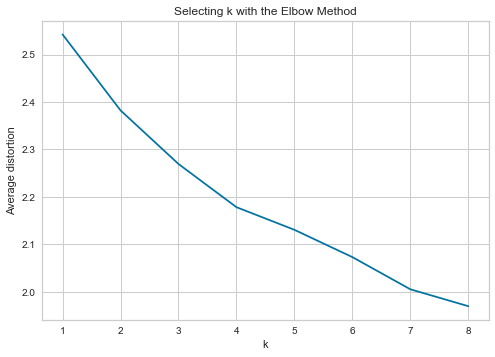

In [33]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Comments**

* Appropriate value for k seems to be 3 and 4.

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.36994286014249894)
For n_clusters = 6, the silhouette score is 0.4105617151682673)
For n_clusters = 7, the silhouette score is 0.40002710126827595)
For n_clusters = 8, the silhouette score is 0.4012847345639638)
For n_clusters = 9, the silhouette score is 0.11243574313321111)


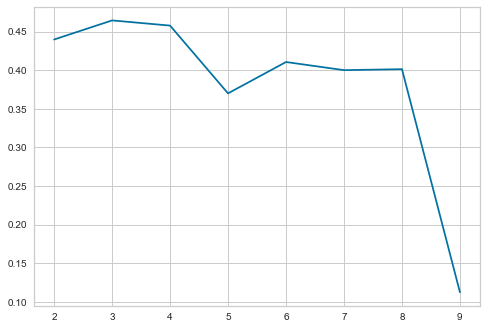

In [34]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Comments**

* Silhouette score for 3 is higher than from 4 and from the others and wwe will keep it as our k value.

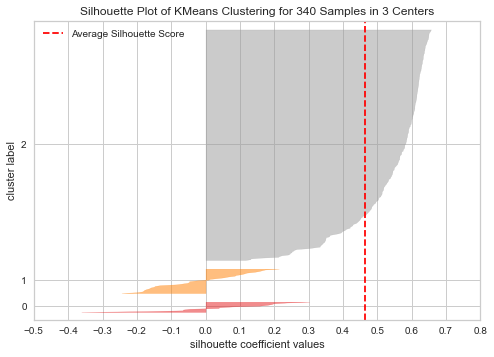

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [36]:
# Taking 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [37]:
# Adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [38]:
cluster_profile = df.groupby("K_means_segments").mean()

In [39]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Current_Price"].count().values
)

In [40]:
# Displaying cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995152,110.461063,1.651207,33


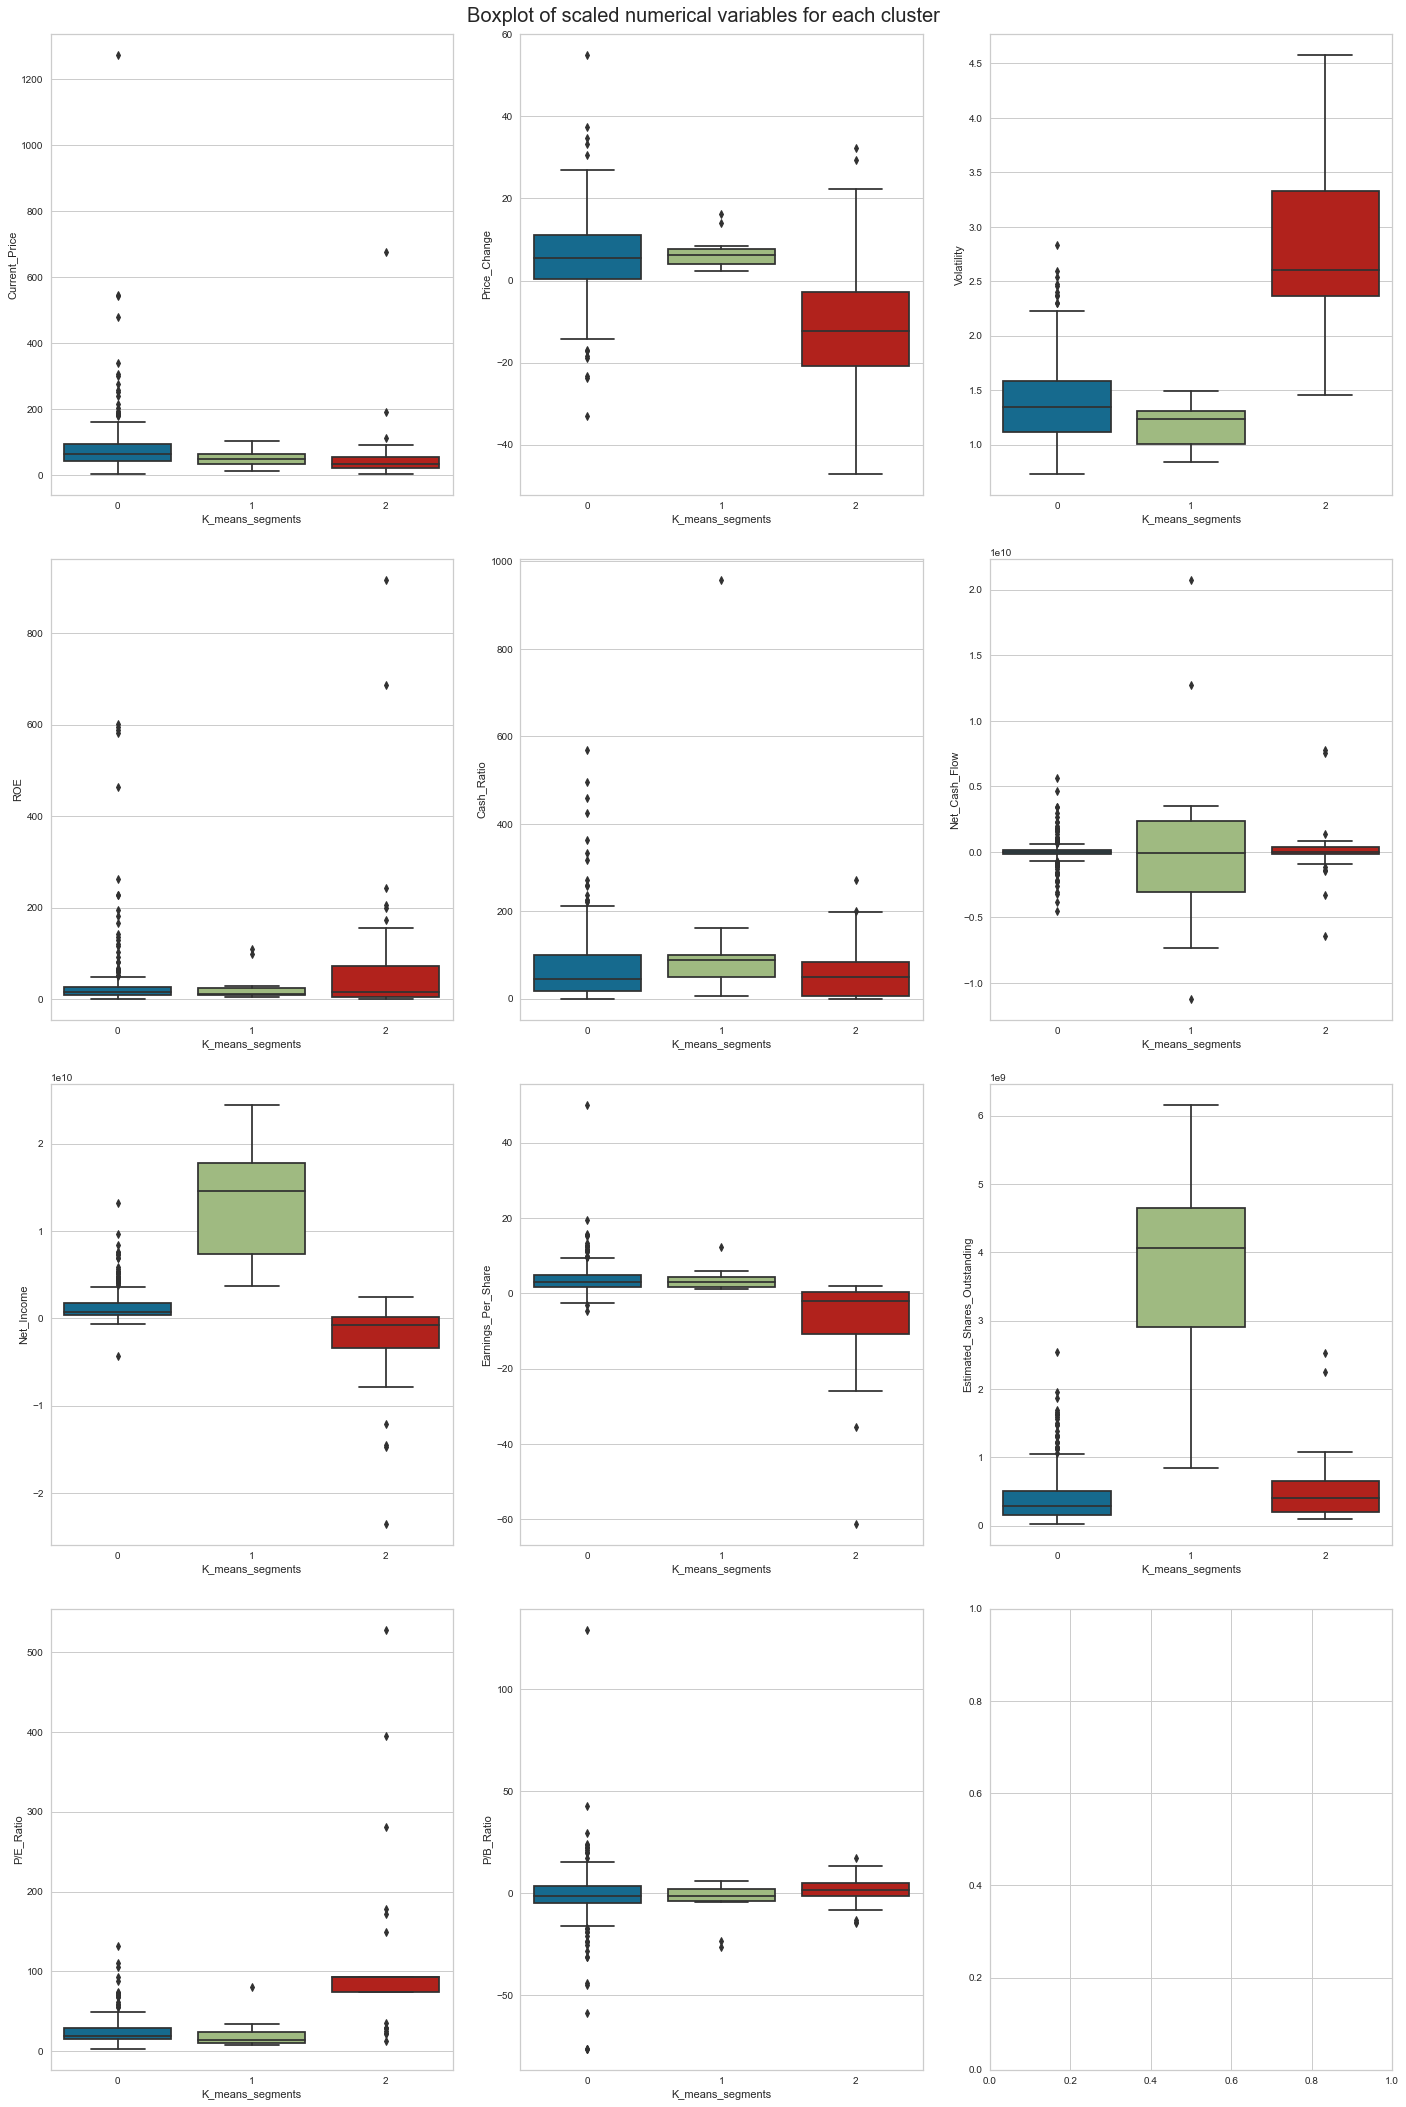

In [41]:
fig, axes = plt.subplots(4, 3, figsize=(20, 30))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0                         
for i in range(4):
    for j in range(3):
        if counter < 11:
            sns.boxplot(
                ax=axes[i][j],
                y=df[num_columns[counter]],
                x=df["K_means_segments"],
            )
            counter = counter + 1

fig.tight_layout(pad=2.0)

In [42]:
pd.crosstab(df.K_means_segments, df.Security).style.highlight_max(
    color="lightgreen", axis=0
)

Security,3M Company,AFLAC Inc,AMETEK Inc,AT&T Inc,AbbVie,Abbott Laboratories,Activision Blizzard,Adobe Systems Inc,Affiliated Managers Group Inc,Akamai Technologies Inc,Alaska Air Group Inc,Albemarle Corp,Alexion Pharmaceuticals,Allegion,Alliance Data Systems,Alliant Energy Corp,Allstate Corp,Altria Group Inc,Amazon.com Inc,Ameren Corp,American Airlines Group,American Electric Power,American Express Co,"American International Group, Inc.",American Tower Corp A,American Water Works Company Inc,Ameriprise Financial,Amgen Inc,Amphenol Corp,Anadarko Petroleum Corp,"Analog Devices, Inc.",Anthem Inc.,Aon plc,Apache Corporation,Apartment Investment & Mgmt,Applied Materials Inc,Archer-Daniels-Midland Co,Arconic Inc,Arthur J. Gallagher & Co.,Assurant Inc,AutoNation Inc,"AvalonBay Communities, Inc.",BB&T Corporation,BIOGEN IDEC Inc.,Baker Hughes Inc,Ball Corp,Bank of America Corp,Bard (C.R.) Inc.,Baxter International Inc.,Boeing Company,BorgWarner,Boston Properties,Boston Scientific,Bristol-Myers Squibb,Broadcom,C. H. Robinson Worldwide,CBRE Group,CF Industries Holdings Inc,CIGNA Corp.,CME Group Inc.,CMS Energy,CSX Corp.,CVS Health,Cabot Oil & Gas,Capital One Financial,Carnival Corp.,Caterpillar Inc.,Celgene Corp.,Centene Corporation,CenterPoint Energy,CenturyLink Inc,Charles Schwab Corporation,Charter Communications,Chesapeake Energy,Chevron Corp.,Chipotle Mexican Grill,Chubb Limited,Church & Dwight,Cimarex Energy,Cincinnati Financial,Citigroup Inc.,Citizens Financial Group,Citrix Systems,Coca Cola Company,Cognizant Technology Solutions,Colgate-Palmolive,Comerica Inc.,Concho Resources,Consolidated Edison,Corning Inc.,Crown Castle International Corp.,Cummins Inc.,DaVita Inc.,Danaher Corp.,Deere & Co.,Delphi Automotive,Delta Air Lines,Dentsply Sirona,Devon Energy Corp.,Digital Realty Trust,Discover Financial Services,Discovery Communications-A,Discovery Communications-C,Dominion Resources,Dover Corp.,Dr Pepper Snapple Group,Du Pont (E.I.),Duke Energy,Dun & Bradstreet,E*Trade,EOG Resources,EQT Corporation,Eastman Chemical,Eaton Corporation,Ecolab Inc.,Edison Int'l,Edwards Lifesciences,Entergy Corp.,Equifax Inc.,Equinix,Equity Residential,"Essex Property Trust, Inc.",Eversource Energy,Exelon Corp.,Expedia Inc.,Expeditors Int'l,Extra Space Storage,Exxon Mobil Corp.,FLIR Systems,FMC Corporation,Facebook,Fastenal Co,Federal Realty Investment Trust,Fidelity National Information Services,First Solar Inc,FirstEnergy Corp,Fiserv Inc,Flowserve Corporation,Fluor Corp.,Ford Motor,Fortune Brands Home & Security,Freeport-McMoran Cp & Gld,Frontier Communications,Garmin Ltd.,General Dynamics,General Growth Properties Inc.,General Motors,Genuine Parts,Gilead Sciences,Goodyear Tire & Rubber,Grainger (W.W.) Inc.,HCA Holdings,HCP Inc.,HP Inc.,Halliburton Co.,Harley-Davidson,Hartford Financial Svc.Gp.,Hasbro Inc.,Henry Schein,Hess Corporation,Hewlett Packard Enterprise,Honeywell Int'l Inc.,Hormel Foods Corp.,Host Hotels & Resorts,Humana Inc.,Huntington Bancshares,IDEXX Laboratories,Illinois Tool Works,Intel Corp.,International Business Machines,International Paper,Interpublic Group,Intl Flavors & Fragrances,Intuitive Surgical Inc.,Invesco Ltd.,Iron Mountain Incorporated,J. B. Hunt Transport Services,JPMorgan Chase & Co.,Jacobs Engineering Group,Juniper Networks,Kansas City Southern,Kimberly-Clark,Kimco Realty,Kinder Morgan,L-3 Communications Holdings,LKQ Corporation,Laboratory Corp. of America Holding,Leggett & Platt,Lennar Corp.,Leucadia National Corp.,Level 3 Communications,Lilly (Eli) & Co.,Lockheed Martin Corp.,LyondellBasell,M&T Bank Corp.,Macerich,Marathon Oil Corp.,Marathon Petroleum,Marriott Int'l.,Marsh & McLennan,Martin Marietta Materials,Masco Corp.,Mastercard Inc.,Mattel Inc.,McCormick & Co.,McDonald's Corp.,Mead Johnson,Merck & Co.,MetLife Inc.,Mettler Toledo,Mid-America Apartments,Mohawk Industries,Molson Coors Brewing Company,Mondelez International,Monster Beverage,Moody's Corp,Murphy Oil,Mylan N.V.,NASDAQ OMX Group,National Oilwell Varco Inc.

In [43]:
# Printing the names of the companies in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["Security"].unique())
    print()


In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cate

## Insights
<i>All observations according to the mean value of the attribute per each cluster</i>

- **Cluster 0**:
    - 293 Companies the majority of all the companies belong to this cluster
    - Erning per Share slightly higher than the others
    - Price change higher than the others 
    - Current Price higher than the others


- **Cluster 1**:
    - 14 Huge Companies and well known
    - 4 From Financial Sector and specially Banks
    - 3 from Health Care (Pharmaceuticals and Biotechnology) 
    - Cluster with companies with the lowest Volatility
    - Net Income higher than the others
    - Estimated Share Outstanding higher than the others
    - Lowest Current Price
    - Higher by far the Cash Ratio as the highest also value (Facebook)

    
- **Cluster 2**:
    - 33 Companies
    - 24 of them from Energy Sector and 16 of them specially from Oil & Gas Exploration & Production Subsector
    - Cluster with companies with the highest mean Volatility
    - Price Change lower than others
    - Net Income lower than the others
    - Eraning per Share lower than the others and negative mean
    - P/E Ratio higher than the others
 

## Hierarchical Clustering

In [44]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9256256322762785.
Cophenetic correlation for Euclidean distance and complete linkage is 0.868928166968695.
Cophenetic correlation for Euclidean distance and average linkage is 0.9507555560579792.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8783499263251745.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9085319970035955.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8284480418954171.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9335782662323194.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8888410614447411.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9252897150762011.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7793043150338124.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9383702428966992.
Cophenetic cor

In [45]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9507555560579792, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9256256322762785.
Cophenetic correlation for complete linkage is 0.868928166968695.
Cophenetic correlation for average linkage is 0.9507555560579792.
Cophenetic correlation for centroid linkage is 0.9437005216488913.
Cophenetic correlation for ward linkage is 0.7069137712704721.
Cophenetic correlation for weighted linkage is 0.8783499263251745.


In [47]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9507555560579792, which is obtained with average linkage.


**Observations**

- We see that the cophenetic correlation is maximum with average linkage.


**Let's see the dendrograms for the different linkage methods.**

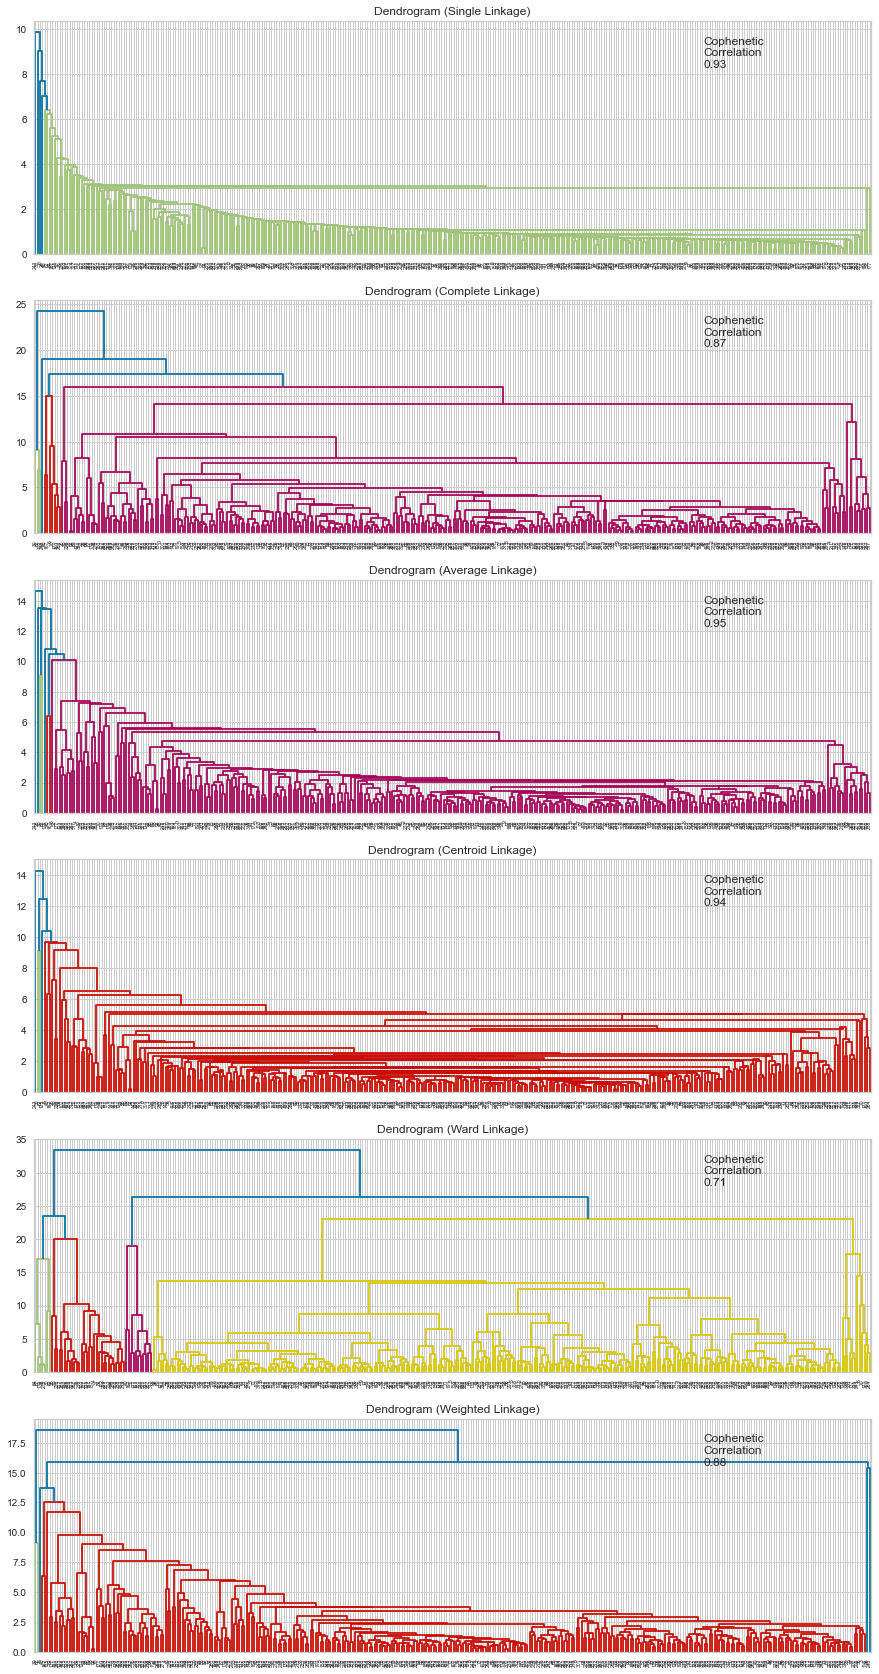

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Weighted linkage shows distinct and separate clusters.

In [49]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.925626
1,complete,0.868928
2,average,0.950756
3,centroid,0.943701
4,ward,0.706914
5,weighted,0.878350


**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

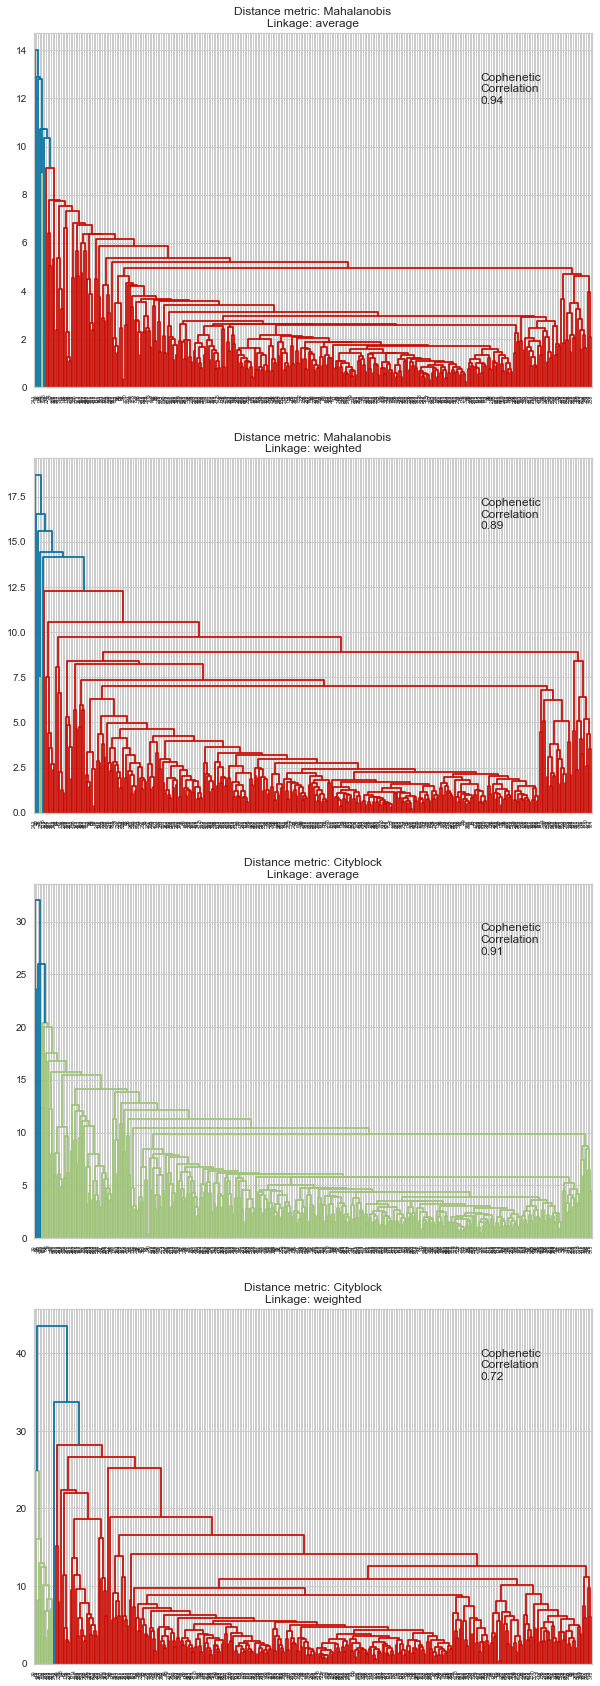

In [50]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Average linkage gave us separate and distinct clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with average linkage method. 

**Let's create 3 clusters.**

In [51]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

In [52]:
# Adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [53]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [54]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current_Price"].count().values
)

In [55]:
# Displaying cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,68.922704,-8.744096,2.529549,155.378378,59.567568,102695972.972973,-2717934621.621622,-6.656216,518092139.647027,102.266484,-1.147640,1.729730,37
1,83.807285,5.620351,1.413971,25.561644,71.294521,30609726.027397,1533254609.589041,3.948065,446410710.374075,24.440917,-1.669765,0.017123,292
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,1.000000,11


In [56]:
# let's see the names of the Security in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following Security names are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 1, the following Security names are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpilla

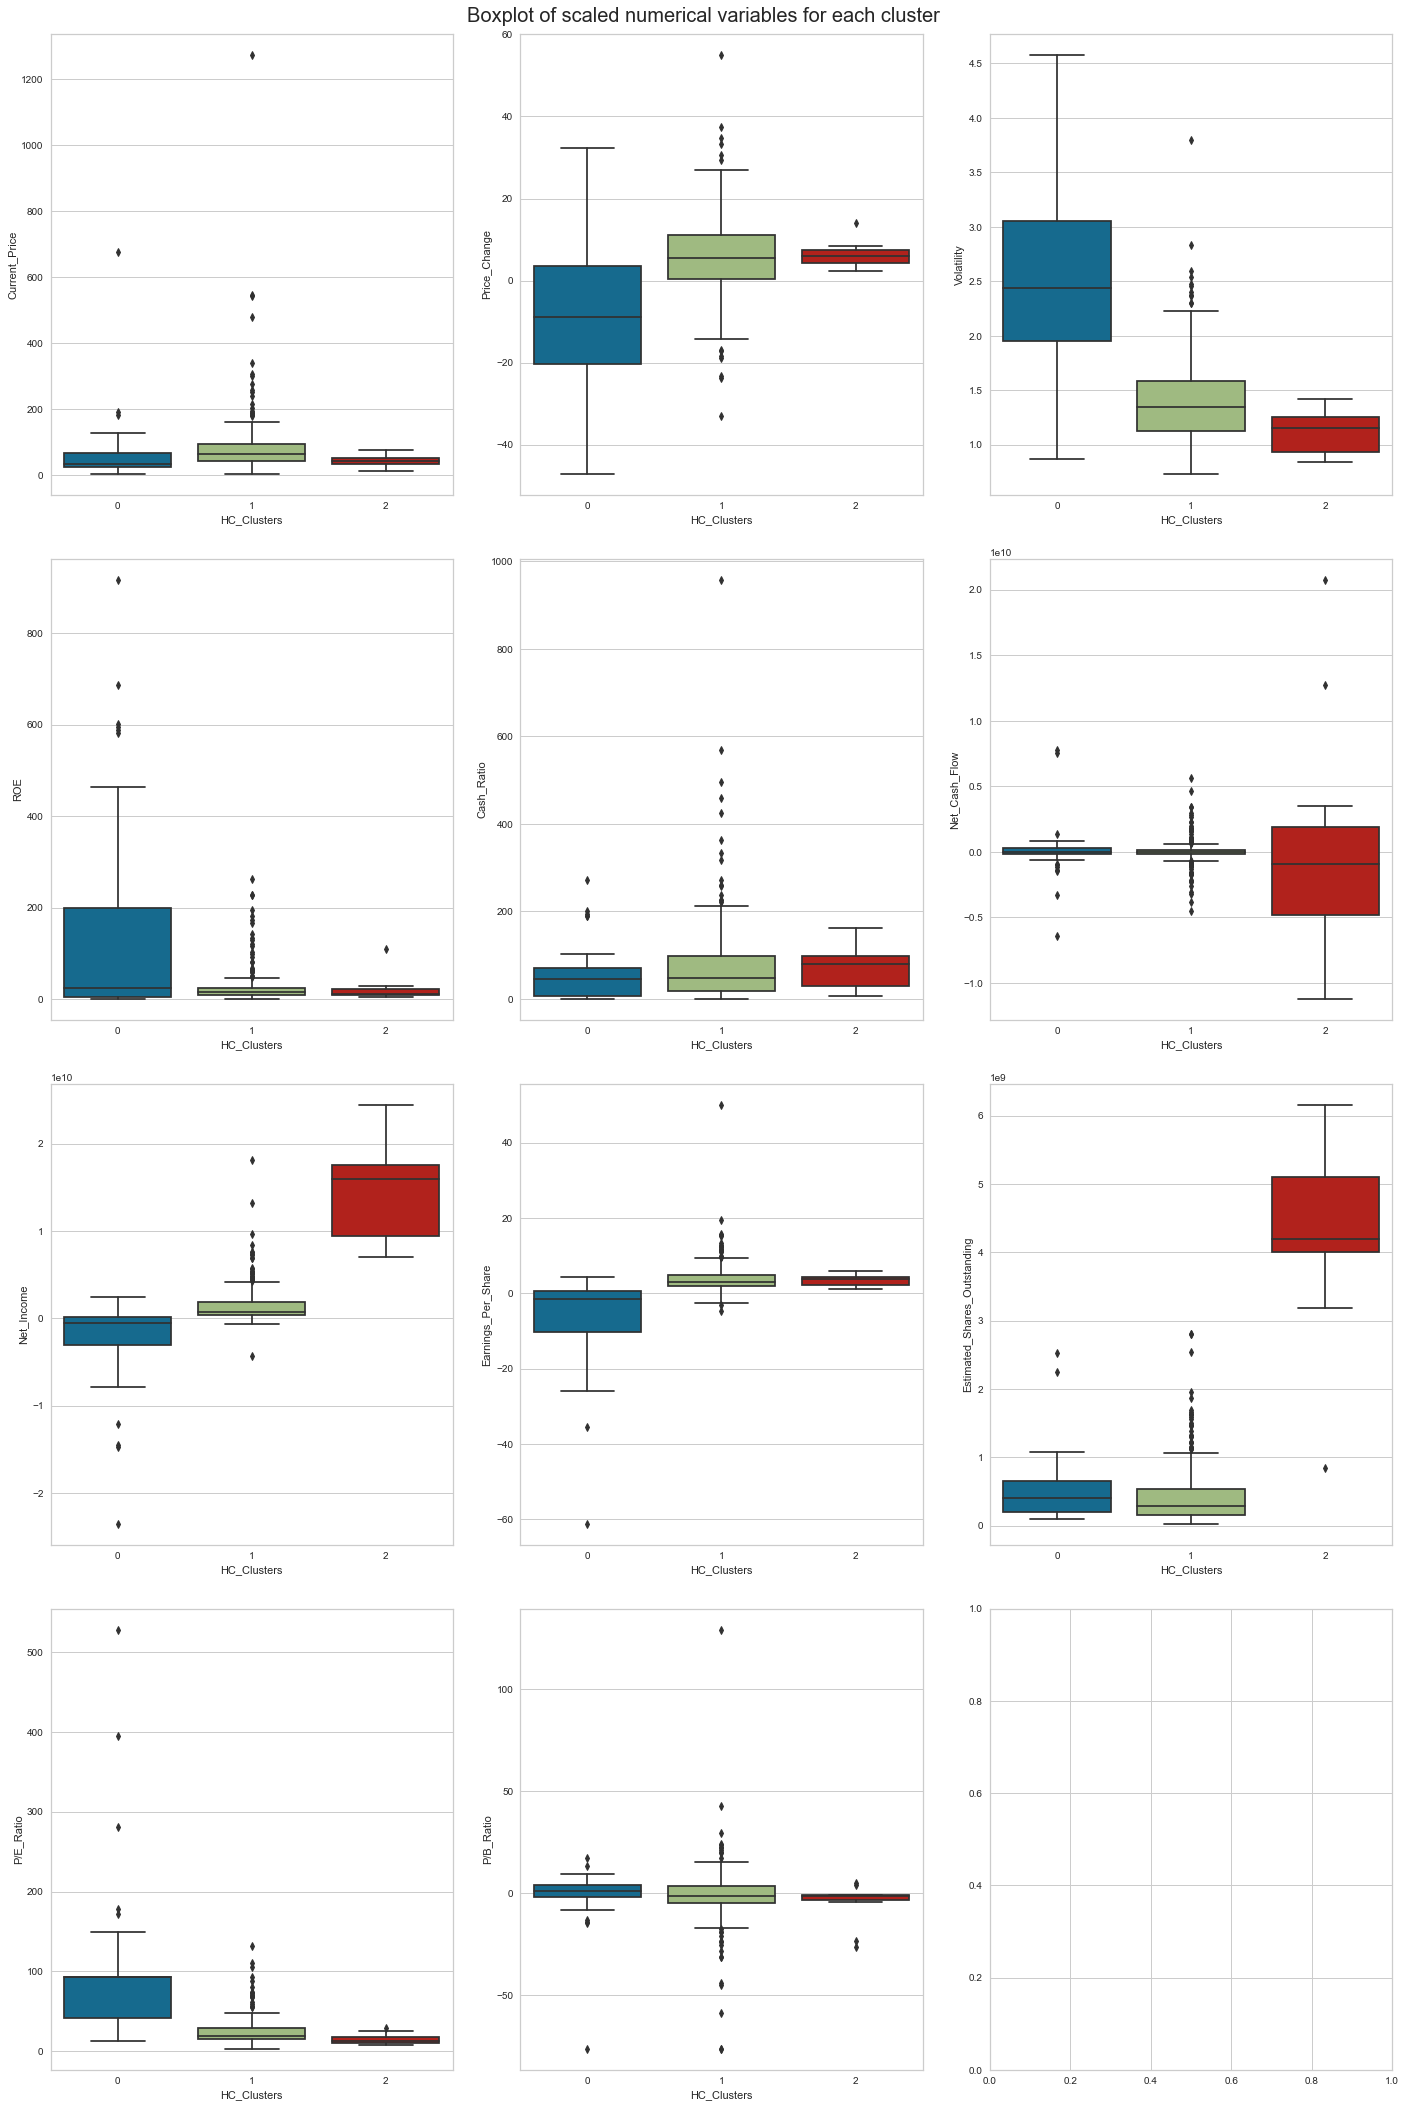

In [57]:
fig, axes = plt.subplots(4, 3, figsize=(20, 30))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0                         
for i in range(4):
    for j in range(3):
        if counter < 11:
            sns.boxplot(
                ax=axes[i][j],
                y=df[num_columns[counter]],
                x=df["HC_Clusters"],
            )
            counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

<i>All observations according to the mean value of the attribute per each cluster</i>



- **Cluster 0**:
    - 37 companies. 24 from them from Energy sector.
    - Second most sequent sector is Information Technology.
    - This cluster contains companies with better scores in Volatility, ROE, P/E Ratio and R/B Ratio.
    - Companies on this cluster have lower values on Price Change, Cash Ratio, Net Income and Earning per Share.   
    

- **Cluster 1**:
    - The majority of companies are listed here 292.
    - This cluster contains companies with higher values in Current Price and Earnings per Share.
    - Companies on this cluster have lower value on Net Cash Flow and at Estimated Shares Outstanding.
     

- **Cluster 2**:
    - 11 Companies. Most sequent is the Financial Sector.
    - This cluster contains companies with higher values at Price change, Cash Ratio, Net Cash Flow, Net Income and Estimated Shares Outstanding.
    - Companies on this cluster have lower value on Current Price, Volatility, ROE, R/E Ratio and R/B Ratio.
  


In [58]:
pd.crosstab(df.HC_Clusters, df.Security).style.highlight_max(color="lightgreen", axis=0)

Security,3M Company,AFLAC Inc,AMETEK Inc,AT&T Inc,AbbVie,Abbott Laboratories,Activision Blizzard,Adobe Systems Inc,Affiliated Managers Group Inc,Akamai Technologies Inc,Alaska Air Group Inc,Albemarle Corp,Alexion Pharmaceuticals,Allegion,Alliance Data Systems,Alliant Energy Corp,Allstate Corp,Altria Group Inc,Amazon.com Inc,Ameren Corp,American Airlines Group,American Electric Power,American Express Co,"American International Group, Inc.",American Tower Corp A,American Water Works Company Inc,Ameriprise Financial,Amgen Inc,Amphenol Corp,Anadarko Petroleum Corp,"Analog Devices, Inc.",Anthem Inc.,Aon plc,Apache Corporation,Apartment Investment & Mgmt,Applied Materials Inc,Archer-Daniels-Midland Co,Arconic Inc,Arthur J. Gallagher & Co.,Assurant Inc,AutoNation Inc,"AvalonBay Communities, Inc.",BB&T Corporation,BIOGEN IDEC Inc.,Baker Hughes Inc,Ball Corp,Bank of America Corp,Bard (C.R.) Inc.,Baxter International Inc.,Boeing Company,BorgWarner,Boston Properties,Boston Scientific,Bristol-Myers Squibb,Broadcom,C. H. Robinson Worldwide,CBRE Group,CF Industries Holdings Inc,CIGNA Corp.,CME Group Inc.,CMS Energy,CSX Corp.,CVS Health,Cabot Oil & Gas,Capital One Financial,Carnival Corp.,Caterpillar Inc.,Celgene Corp.,Centene Corporation,CenterPoint Energy,CenturyLink Inc,Charles Schwab Corporation,Charter Communications,Chesapeake Energy,Chevron Corp.,Chipotle Mexican Grill,Chubb Limited,Church & Dwight,Cimarex Energy,Cincinnati Financial,Citigroup Inc.,Citizens Financial Group,Citrix Systems,Coca Cola Company,Cognizant Technology Solutions,Colgate-Palmolive,Comerica Inc.,Concho Resources,Consolidated Edison,Corning Inc.,Crown Castle International Corp.,Cummins Inc.,DaVita Inc.,Danaher Corp.,Deere & Co.,Delphi Automotive,Delta Air Lines,Dentsply Sirona,Devon Energy Corp.,Digital Realty Trust,Discover Financial Services,Discovery Communications-A,Discovery Communications-C,Dominion Resources,Dover Corp.,Dr Pepper Snapple Group,Du Pont (E.I.),Duke Energy,Dun & Bradstreet,E*Trade,EOG Resources,EQT Corporation,Eastman Chemical,Eaton Corporation,Ecolab Inc.,Edison Int'l,Edwards Lifesciences,Entergy Corp.,Equifax Inc.,Equinix,Equity Residential,"Essex Property Trust, Inc.",Eversource Energy,Exelon Corp.,Expedia Inc.,Expeditors Int'l,Extra Space Storage,Exxon Mobil Corp.,FLIR Systems,FMC Corporation,Facebook,Fastenal Co,Federal Realty Investment Trust,Fidelity National Information Services,First Solar Inc,FirstEnergy Corp,Fiserv Inc,Flowserve Corporation,Fluor Corp.,Ford Motor,Fortune Brands Home & Security,Freeport-McMoran Cp & Gld,Frontier Communications,Garmin Ltd.,General Dynamics,General Growth Properties Inc.,General Motors,Genuine Parts,Gilead Sciences,Goodyear Tire & Rubber,Grainger (W.W.) Inc.,HCA Holdings,HCP Inc.,HP Inc.,Halliburton Co.,Harley-Davidson,Hartford Financial Svc.Gp.,Hasbro Inc.,Henry Schein,Hess Corporation,Hewlett Packard Enterprise,Honeywell Int'l Inc.,Hormel Foods Corp.,Host Hotels & Resorts,Humana Inc.,Huntington Bancshares,IDEXX Laboratories,Illinois Tool Works,Intel Corp.,International Business Machines,International Paper,Interpublic Group,Intl Flavors & Fragrances,Intuitive Surgical Inc.,Invesco Ltd.,Iron Mountain Incorporated,J. B. Hunt Transport Services,JPMorgan Chase & Co.,Jacobs Engineering Group,Juniper Networks,Kansas City Southern,Kimberly-Clark,Kimco Realty,Kinder Morgan,L-3 Communications Holdings,LKQ Corporation,Laboratory Corp. of America Holding,Leggett & Platt,Lennar Corp.,Leucadia National Corp.,Level 3 Communications,Lilly (Eli) & Co.,Lockheed Martin Corp.,LyondellBasell,M&T Bank Corp.,Macerich,Marathon Oil Corp.,Marathon Petroleum,Marriott Int'l.,Marsh & McLennan,Martin Marietta Materials,Masco Corp.,Mastercard Inc.,Mattel Inc.,McCormick & Co.,McDonald's Corp.,Mead Johnson,Merck & Co.,MetLife Inc.,Mettler Toledo,Mid-America Apartments,Mohawk Industries,Molson Coors Brewing Company,Mondelez International,Monster Beverage,Moody's Corp,Murphy Oil,Mylan N.V.,NASDAQ OMX Group,National Oilwell Varco Inc.

## K-means vs Hierarchical Clustering

**- Which clustering technique took less time for execution?**

    - Both the KMeans model and the Agglomerative Clustering took almos the same excecution time.
  



**- Which clustering technique gave you more distinct clusters, or are they the same?**

    - Both algorithms gave similar clusters. On both algorithms were one cluster with the majority of the companies & other two then with a range  between 10 to 40 companies.



**- How many observations are there in the similar clusters of both algorithms?**

    - Both algorithms yielded similar clusters based on the outliers within the 11 variables



**- How many clusters are obtained as the appropriate number of clusters from both algorithms?**

    - 3 clusters for both algorithms was the appropriate number


**You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.**


Differences between the included companies on each cluster on both algorithms:

* K-Means 
    - Cluster 0 --> 293 Companies
    - Cluster 1 --> 33 Compaies
    - Cluster 2 --> 14 Companies

--------------------------------------------------

* Hierarchical  
    - Cluster 0 --> 292 Companies
    - Cluster 1 --> 37 Companies
    - Cluster 2 --> 11 Companies

## Actionable Insights and Recommendations


- The Trade&Ahed has to take seriously this cluster seperation for further future purposes and better analysis in order to provide best services to it's clients and make better profit for itself.
- The Trade&Ahead have to keep take care of its dataset and to keep its entries without missing values or without wrong prices. Not correct added information could adversely affect the whole procedure.  
- Of course is needed also the investment requirements from the client. As soon as they are known, then there is no issue to address directly the appropriate solution and to formulate a better strategy for its clients. 